In [1]:
import pandas as pd
from math import floor, ceil
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

#import ROOT


This file will be used to access data faster while writing the actual code

In [2]:
df_full = pd.read_parquet('/Users/giogi/Desktop/Stage INFN/PID ITS/data/Df_filtered_ITS2Cluster505673.parquet.gzip')
print(df_full.columns)
df_full.describe()

Index(['p', 'pt', 'tgL', 'meanClsize', 'dedx', 'nSigmaDeu', 'nSigmaP',
       'nSigmaK', 'nSigmaPi', 'tpcITSchi2', 'ClSizeL0', 'SnPhiL0', 'TanLamL0',
       'PattIDL0', 'ClSizeL1', 'SnPhiL1', 'TanLamL1', 'PattIDL1', 'ClSizeL2',
       'SnPhiL2', 'TanLamL2', 'PattIDL2', 'ClSizeL3', 'SnPhiL3', 'TanLamL3',
       'PattIDL3', 'ClSizeL4', 'SnPhiL4', 'TanLamL4', 'PattIDL4', 'ClSizeL5',
       'SnPhiL5', 'TanLamL5', 'PattIDL5', 'ClSizeL6', 'SnPhiL6', 'TanLamL6',
       'PattIDL6'],
      dtype='object')


,p,pt,tgL,meanClsize,dedx,nSigmaDeu,nSigmaP,nSigmaK,nSigmaPi,tpcITSchi2,...,TanLamL4,PattIDL4,ClSizeL5,SnPhiL5,TanLamL5,PattIDL5,ClSizeL6,SnPhiL6,TanLamL6,PattIDL6
count,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,...,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06,1.689838e+06
mean,6.742597e-01,5.911738e-01,1.200016e-02,2.472702e+00,6.394935e+01,1.234338e+01,9.905283e+00,6.957153e+00,2.303542e+00,2.966324e+00,...,-1.022843e+00,2.947374e+00,5.613639e-01,-1.777704e+00,-1.768792e+00,2.244748e+00,3.345114e-02,-2.260023e+00,-2.248124e+00,1.691089e+00
std,1.908020e+01,1.656404e+01,5.658654e-01,7.365476e-01,4.380618e+01,5.572155e+00,4.065159e+00,4.567666e+00,8.202983e+00,2.437406e+00,...,3.092391e+00,1.110879e+01,4.941091e+00,3.828160e+00,3.861580e+00,1.177239e+01,5.379335e+00,4.187787e+00,4.218718e+00,1.196580e+01
min,3.066582e-02,3.065448e-02,-1.026516e+00,7.065744e-01,6.895371e+00,-4.302571e+03,-2.681915e+02,1.126011e-05,0.000000e+00,7.718064e-04,...,-1.000000e+01,-1.000000e+01,-1.000000e+01,-1.000000e+01,-1.000000e+01,-1.000000e+01,-1.000000e+01,-1.000000e+01,-1.000000e+01,-1.000000e+01
25%,2.653894e-01,2.345422e-01,-4.556926e-01,1.988994e+00,5.040195e+01,1.212727e+01,7.571914e+00,2.853190e+00,4.139862e-01,1.024318e+00,...,-6.390629e-01,1.000000e+00,1.000000e+00,-2.595215e-01,-8.078921e-01,0.000000e+00,1.000000e+00,-4.249661e-01,-9.456910e-01,0.000000e+00
50%,4.390059e-01,3.851735e-01,1.853444e-02,2.334656e+00,5.462420e+01,1.354833e+01,1.148223e+01,7.164817e+00,8.996711e-01,2.240117e+00,...,-9.109482e-02,2.000000e+00,2.000000e+00,-6.765064e-02,-1.843499e-01,2.000000e+00,2.000000e+00,-1.006508e-01,-2.513690e-01,1.000000e+00
75%,7.236801e-01,6.326439e-01,4.818639e-01,2.792001e+00,6.228134e+01,1.399714e+01,1.317731e+01,1.069505e+01,1.664277e+00,4.340347e+00,...,4.252045e-01,3.000000e+00,3.000000e+00,1.091473e-01,3.768592e-01,3.000000e+00,3.000000e+00,1.158373e-01,3.506365e-01,3.000000e+00
max,1.343076e+04,1.000000e+04,1.026517e+00,2.831307e+01,6.637278e+03,1.627446e+03,1.380399e+02,3.935679e+02,1.644415e+03,9.999997e+00,...,1.026517e+00,3.840000e+02,5.100000e+01,8.499171e-01,1.026517e+00,1.950000e+02,5.500000e+01,8.499651e-01,1.026517e+00,2.000000e+02


In [5]:
df_full.dtypes

p             float32
pt            float32
tgL           float32
meanClsize    float32
dedx          float32
nSigmaDeu     float32
nSigmaP       float32
nSigmaK       float32
nSigmaPi      float32
tpcITSchi2    float32
ClSizeL0      float32
SnPhiL0       float32
TanLamL0      float32
PattIDL0      float32
ClSizeL1      float32
SnPhiL1       float32
TanLamL1      float32
PattIDL1      float32
ClSizeL2      float32
SnPhiL2       float32
TanLamL2      float32
PattIDL2      float32
ClSizeL3      float32
SnPhiL3       float32
TanLamL3      float32
PattIDL3      float32
ClSizeL4      float32
SnPhiL4       float32
TanLamL4      float32
PattIDL4      float32
ClSizeL5      float32
SnPhiL5       float32
TanLamL5      float32
PattIDL5      float32
ClSizeL6      float32
SnPhiL6       float32
TanLamL6      float32
PattIDL6      float32
dtype: object

In [6]:
type(df_full['p'])

pandas.core.series.Series

In [ ]:
df_full.head(10)

In [3]:

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)


def scatter_density_plot(fig, x, y):
   ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
   density = ax.scatter_density(x, y, cmap=white_viridis)
   fig.colorbar(density)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


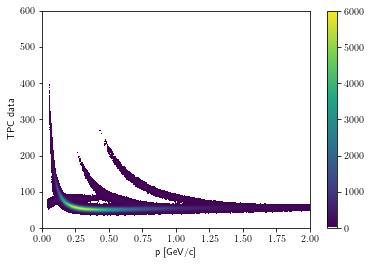

In [9]:
fig = plt.figure()
scatter_density_plot(fig, df_full['p'], df_full['dedx'])

plt.xlabel('p [GeV/c]')
plt.ylabel('TPC data')
plt.xlim(0, 2)
plt.ylim(0, 600)

plt.savefig('TPCsignals.png')
plt.show()

The momentum selection criteria can be chosen as 
- pi: 0 < p < 0.5
- K: 0.25 < p < 0.5
- p: 0.5 < p < 1